<a href="https://colab.research.google.com/github/piyushagni5/M.Tech_project_file/blob/master/Project_file_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!pip freeze


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
asgiref==3.2.7
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.1.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==1.4.0
boto==2.49.0
boto3==1.13.4
botocore==1.16.4
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==3.1.1
catalogue==1.0.0
certifi==2020.4.5.1
cffi==1.14.0
chainer==6.5.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.17
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
decorator==4.4.2
defused

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!pip install csaps

In [6]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=744bd7a89c7d8691931954016943a0f472d67c5d5db0f04d16729eaf4c26eec3
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
import wave
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import random

from scipy.io.wavfile import read
import scipy

from random import random
import math
from numpy.linalg import inv
from scipy.linalg import toeplitz

import wave, os, glob

from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator as pchip

import librosa

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

#from pycm import *
from sklearn.svm import SVC

import time

from sklearn.utils import shuffle
import csaps

In [0]:
from python_speech_features import mfcc
from python_speech_features import logfbank
from python_speech_features.sigproc import preemphasis
from python_speech_features.base import delta
from python_speech_features.base import fbank
from python_speech_features.sigproc import framesig

from termcolor import colored

### EMODB DATASET DESCRIPTION

1. 6 basics emotions- W-anger, L-boredom, E-disgust, A-anxiety, F-happiness, T-sadness, N-neutral

2. 5F, 5M (10 utterences, 5 short & 5 longer)

3. filename = 03a01Fa.wav --> 03-a01-F-a.wav
              03--> speaker detail(M,31 year old) others are [08,09,10,11,12,13,14,15,16]
              a01--> code for text
              F--> emotion code
              a--> if there are more than 2 versions (there are no. a,b,c...)

In [0]:
# fixed points taken for spline interpolation
xv=[0,0.35,0.69,1]    

# FIXED PARAMETER FOR endSPLINE 2
r_1=np.random.rand(4)
#x2_fixed =np.sort(r_1)
#x2_fixed=x2_fixed.tolist()

#x2_fixed.insert(0,0.002)
#x2_fixed.insert(5,1)
#x2_fixed = np.sort(x2_fixed)
x2_fixed=np.linspace(0,1,6)

x2_modified=np.asarray(x2_fixed)

total_fbank = 30
nf=26

# nf equidistant point in between 0 & 1
xx=np.linspace(0,1,nf+2)              # will replace xx_full

yv=np.zeros((total_fbank,4))                 # initialising y values for spline 1
#y2_rand=np.zeros((total_fbank,4))            # initialising y values for spline 2
y2_rand=np.zeros((total_fbank,6))

sigma=np.zeros(total_fbank)           # 1-D arrray
rho=np.zeros(total_fbank)

EA_population=np.zeros((total_fbank,8))           # random EA population


In [0]:
x2_modified

array([0.02      , 0.01133486, 0.26456673, 0.30482349, 0.59463079,
       1.        ])

In [0]:
for fb in range (total_fbank):                               # total_filterbank
       
    #PARAMETER INITIALIZATION FOR SPLINE 1   
    a=0.1                                            #parameter to limit range of spline in bet. 0 & 1   
    y1=a+random()*(1-2*a)
    delta=random()*(1-a-y1)
    y2=y1+delta
    
    yv[fb][:]=[0,y1,y2,1]
    
    # 1st derivative calculation at end points
    s1 = xv[0]-xv[1]         # sigma is the 1st derivative at x=0,y=0
    s2 = xv[0]-xv[2]
    s3 = xv[0]-xv[3]
    s12 = s1-s2
    s13 = s1-s3 
    s23 = s2-s3
    sigma[fb]=-(s1*s2/(s13*s23*s3))*yv[fb][3]+(s1*s3/(s12*s2*s23))*yv[fb][2]-(s2*s3/(s1*s12*s13))*yv[fb][1]+(1./s1+1./s2+1./s3)*yv[fb][0]
    
    s11 = xv[3]-xv[2]         #rho is the 1st derivative at x=1,y=1
    s22 = xv[3]-xv[1]
    s33 = xv[3]-xv[0]
    s_12 = s11-s22 
    s_13 = s11-s33 
    s_23 = s22-s33
    rho[fb]=-(s11*s22/(s_13*s_23*s33))*yv[fb][0]+(s11*s33/(s_12*s22*s_23))*yv[fb][1]-(s22*s33/(s11*s_12*s_13))*yv[fb][2]+(1./s11+1./s22+1./s33)*yv[fb][3]
    
    # PARAMETER INTIALIZATION FOR SPLINE 2
    y2_rand[fb,:]= np.random.rand(6)*(0.9-0.25)+0.25
    
    #cc=[y1, delta, sigma[0,fb], rho[0,fb]]+ y2_rand[fb,:].tolist()
    EA_population[fb,:]=[y1, delta, sigma[fb], rho[fb]]+ y2_rand[fb,1:5].tolist()


In [0]:
## SPLITTING TRAINING & TESTING DATASET 

fs=8000

X_data = []
Y_data = []

X_test = []
Y_test = []

path = '/content/drive/My Drive/MTP Project code /emodb/wav'

for filename in glob.glob(os.path.join(path, '*.wav')):
    
    #samplerate, data = scipy.io.wavfile.read(filename,mmap=False)
    data, sampling_rate = librosa.load(filename,sr=None)
    # selecting speaker 15 & 16 for testing dataset
    
    if(filename[17:19]=='15' or filename[17:19]=='16'):
        X_test.append(data)
        if (filename[57]=='W'):
            Y_test.append(0)  
        elif(filename[57]=='L'):
            Y_test.append(1)
        elif(filename[57]=='E'):
            Y_test.append(2)
        elif(filename[57]=='A'):
            Y_test.append(3)
        elif(filename[57]=='F'):
            Y_test.append(4)
        elif(filename[57]=='T'):
            Y_test.append(5)
        else:                                #(filename[22]=='N')
            Y_test.append(6)
    else:
        X_data.append(data)
        if (filename[57]=='W'):
            Y_data.append(0)  
        elif(filename[57]=='L'):
            Y_data.append(1)
        elif(filename[57]=='E'):
            Y_data.append(2)
        elif(filename[57]=='A'):
            Y_data.append(3)
        elif(filename[57]=='F'):
            Y_data.append(4)
        elif(filename[57]=='T'):
            Y_data.append(5)
        else:                                #(filename[22]=='N')
            Y_data.append(6)
        

In [0]:
fs=8000

X_all = []
Y_all = []

path = '/content/drive/My Drive/MTP Project code /emodb/wav'

for filename in glob.glob(os.path.join(path, '*.wav')):
    
    data, sampling_rate = librosa.load(filename,sr=None)
    
    X_all.append(data)
    if (filename[57]=='W'):
        Y_all.append(0)  
    elif(filename[57]=='L'):
        Y_all.append(1)
    elif(filename[57]=='E'):
        Y_all.append(2)
    elif(filename[57]=='A'):
        Y_all.append(3)
    elif(filename[57]=='F'):
        Y_all.append(4)
    elif(filename[57]=='T'):
        Y_all.append(5)
    else:                                #(filename[22]=='N')
        Y_all.append(6)
        
X_pre_emp = []
N_all = len(X_all)

for i in range(N_all):
    X_pre_emp.append(preemphasis(X_all[i], coeff=0.94))

In [0]:
len(X_all)

535

for this error RuntimeWarning: invalid value encountered in double_scalars, import orderedDict

In [0]:
from python_speech_features.base import delta

t1 = time.perf_counter()

from collections import OrderedDict
old_settings = np.seterr(all='print')
OrderedDict(np.geterr())

gen = 1                                        # no. of generation
valid_accuracy = np.zeros((total_fbank,gen))
g = 0

#N_data = len(X_data)

#N_test = len(X_test)

feat_size=42
 
while(g<gen):
    
    for fb in range (total_fbank):                                           # fb=1:total_fbank
        
        # formation of spline 1
        y_spline1 = splineinterpolation(xv,yv[fb][:],EA_population[fb][2], EA_population[fb][3])  

        #plot(xx_mod,y_spline1)  
        y_min= min(y_spline1)                      
        y_max= max(y_spline1)

        ## OPTIMAIZATION OF FITER FREQ. LOCATION 
        freq=np.zeros(nf+1)
        for i in range (nf+1):                                   # i = 1:nf+1                            
            freq[i] = (y_spline1[i]-y_min)*fs/(2*(y_max-y_min))

        freq=np.sort(freq)

        ## OPTIMIZATION OF FILTER AMPLITUDE
        #y2_modified = [0.2]+ y2_rand[fb,:].tolist()+[1]
        y2_modified = y2_rand[fb,:].tolist()
        cs=csaps.CubicSmoothingSpline(x2_modified, y2_modified, smooth=1)
        #cs = pchip(x2_modified, y2_modified)
        y_spline2=cs(xx)               # xx consists nf+2 pts. including end points

        #plt.plot(x2_modified, y2_modified, 'o', label='data')
        #plt.plot(xx, cs(xx), label="S")

        maxi=0
        for i in range(nf-1):                                     #i=1:nf-1
            t=np.absolute(freq[i+2]-freq[i])
            if(t > maxi):
                maxi=t

        N=256
        col=math.ceil(maxi*N/fs)+10
        filters=np.zeros((26,col))

        BW=np.zeros(nf)
        for i in range (nf):                                         # i=1:nf
            BW[i]=6.23*pow(freq[i]/1000,2)+93.39*(freq[i]/1000)+28.52

        for i in range (nf):                                               # i=1:nf
            yline1=[]
            yline2=[]

            ff1=freq[i]-BW[i]/2
            ff2=freq[i]+BW[i]/2
            if(ff1>0):
                f1=np.arange(ff1,freq[i]+1,fs/N)                             #ff1:fs/N:freq(i)
            else:
                f1=np.arange(0,freq[i]+1,fs/N)                              #0:fs/N:freq[i]

            if(ff2>(fs/2)):
                f2=np.arange(freq[i],(fs/2)+1,fs/N)                         #freq(i):fs/N:(fs/2);
                freq_inter=np.intersect1d(f2,fs/2)
                if(len(freq_inter)==0):
                    f2=np.append(f2,fs/2)

            else:
                f2=np.arange(freq[i],ff2+1,fs/N)                                      #freq(i):fs/N:ff2;
                freq_inter=np.intersect1d(f2,ff2)
                if(len(freq_inter)==0):
                    f2=np.append(f2,ff2)


            if(freq[i]==0 or freq[i]==fs/2):
                if(freq[i]==0):
                    yline1.append(np.array([0]))
                    yline2.append(-y_spline2[i]*(f2-ff2)/(ff2-freq[i]))
                else:
                    yline1.append(-y_spline2[i]*(f1-ff1)/(ff1-freq[i]))
                    yline2.append(np.array([0]))

            elif(ff1<0 and freq[i]!=0 and ff2 <= fs/2 ):
                yline1.append(y_spline2[i]*f1/freq[i])
                yline2.append(-y_spline2[i]*(f2-ff2)/(ff2-freq[i]))

            elif(ff2 > (fs/2) and freq[i] < (fs/2) and ff1>0):
                yline1.append(-y_spline2[i]*(f1-ff1)/(ff1-freq[i]))
                yline2.append(-y_spline2[i]*(f2-(fs/2))/((fs/2)-freq[i]))
            else:
                yline1.append(-y_spline2[i]*(f1-ff1)/(ff1-freq[i]))
                yline2.append(-y_spline2[i]*(f2-ff2)/(ff2-freq[i]))

            L1=yline1[0].tolist()
            L2=yline2[0].tolist()
            yline= L1+L2

            k_len=len(yline)
            f_final=np.append(f1,f2)
            filters[i,0:k_len]=yline

            #plt.plot(f_final,filters[i,0:k_len])             # filters(i,1:k_len)

        #plt.plot(freq ,y_spline2[0:-1])                  # y_spline2(1:end-1)
        """
        X_set=np.zeros((N_all,feat_size))

        for i in range(N_all):

            y_noisy=X_pre_emp[i]
            #X_set[i,:]=Mfcc_noisysig(y_noisy,fs,freq,filters)
            X_set[i,:] = Mfcc_revised(y_noisy,fs,freq,filters)   #MFCC function for original signal without any noise

        #X_train,X_valid,Y_train,Y_valid = data_norm_and_split(X_set,Y_all)
        #Y_valid_pred, acc_valid = SVM_accuracy(X_train,X_valid,Y_train,Y_valid)
        #valid_accuracy[fb,g]= acc_valid
        """   
        y_noisy = AWGN_new(X_pre_emp, 10)
        X_set, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy = Mfcc_revised_noisy(y_noisy, fs,freq,filters)
        
        seed = 42
        X_shuffle, y_shuffle = shuffle(X_set, Y_all, random_state=seed)

        X_train,X_test,Y_train,Y_test = data_norm_and_split(X_shuffle,y_shuffle)

        valid_svc = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                        decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
                        max_iter=-1, probability=False, random_state=None, shrinking=True,
                        tol=0.001, verbose=False)
        valid_svc.fit(X_train, Y_train)
        valid_accuracy[fb,g] = valid_svc.score(X_test, Y_test)
        
    if (g < gen-1):
        EA_population, yv, y2_rand = Evolution(EA_population,valid_accuracy,yv,g)

    g=g+1

t2 = time.perf_counter()
print(f'Finished in {(t2-t1)/60} minutes')

KeyboardInterrupt: ignored

In [0]:
valid_accuracy

array([[0.44859813],
       [0.37383178],
       [0.41121495],
       [0.44859813],
       [0.42056075]])

In [0]:
X_set[0]

array([ 4.13178998e+01,  1.67174343e+01,  1.23859820e+01,  1.02701475e+01,
        4.29569600e+00,  5.78429891e+00,  6.99685851e+00,  5.34136266e+00,
        4.60884204e+00,  5.40202065e+00,  5.35708841e+00,  5.82668539e+00,
        5.65244387e+00,  1.83619928e-01, -7.23667831e-02, -2.79627420e-02,
        6.27403483e-02, -3.07627034e-03, -3.22582740e-02,  4.05289682e-02,
        2.72655700e-02,  2.36699979e-02,  5.04354834e-03,  4.08327056e-02,
        7.96338919e-02,  1.37769035e-02,  7.96294359e-05, -2.43450746e-03,
       -2.23266884e-04,  7.95126121e-04, -6.70483879e-04, -1.88278352e-04,
       -1.31125411e-03, -9.27919076e-04, -7.52786632e-04, -6.55455184e-04,
       -1.91206654e-04,  1.96886655e-04, -4.36887391e-04,  1.48287177e+00,
        2.00319688e-01,  6.30310570e+00])

In [0]:
#Finished in 13.29455957103333 minutes

In [0]:
def Mfcc_revised_noisy(X_data, fs, freq, filters):
    
    N_data=len(X_data)
    fs=8000   ## fs=8 kHz
    feat_size = 42

    feature_vect = np.zeros((N_data, feat_size))

    mfcc_coeff = np.zeros((N_data, 13))
    delta_coeff = np.zeros((N_data, 13))
    delta_delta_coeff = np.zeros((N_data, 13))
    frame_energy = np.zeros((N_data,3))
    
    N = 256
    frame_len = 0.03*fs
    M = 13          #13 point dct of a voiced frame signal
    nf = 26
    
    ## using a 30-ms Hamming window with 7.5-ms step.
    for i in range (N_data):
      
        frames = framesig(X_data[i], frame_len, frame_step= 0.75*frame_len, winfunc=np.hamming)
        frame_num = len(frames)

        y_fft=[]
        energy = []
        noisy_initial=np.zeros(N)
        z=1
        avg_energy = 0
        for jk in range(frame_num):
            temp = np.dot(frames[fr],frames[fr])
            energy.append(temp)
            avg_energy += temp

        avg_energy = avg_energy/frame_num
        threshold = avg_energy*0.06
        voiced_energy = []

        for fr in range(len(frames)):
            if (energy[fr] > threshold):                     #energy[q]/frame_len < 0.2, not dividing by frame_len
                voiced_energy.append(energy[fr])
                temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                y_fft.append(temp_fft*temp_fft)      # NOTE:- TAKING THE SQUARE OF THE FFT OF EACH FRAME
            else:
                if(z<=3):
                    temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                    noisy_initial = noisy_initial + (temp_fft*temp_fft)
                    z=z+1
        
        voiced_energy = np.asarray(voiced_energy)
        y_fft = np.asarray(y_fft)          # shape (-,256)
        y_fft = np.transpose(y_fft)    
        voiced_frame_no = y_fft.shape[1]
        
        noisy_initial=noisy_initial/3              # estimating initial noise power spectrum
        lamda=0.97                                 #forgetting factor
        s_t = y_fft                                # spectrum of noisy signal
        noisy_t = np.zeros((N,voiced_frame_no))    # noise spectrum of each frame
        noisy_t[:,0] = lamda*noisy_initial + (1-lamda)*s_t[:,0]

        for qr in range (1,voiced_frame_no):                              # q=2:length(frame_energy)
            noisy_t[:,qr] = lamda*noisy_t[:,qr-1] + (1-lamda)*s_t[:,qr]

        frame_energy[i,:] = [np.mean(voiced_energy), min(voiced_energy), max(voiced_energy) ]

        DCT_mat = np.zeros((voiced_frame_no,M))  

        for p in range (voiced_frame_no):        # p=1:frame_no                    
            E_spect=np.zeros(nf-3)
            E_noisy_spect=np.zeros(nf-3)        #output of nf Mel-scaled filter when estimated noise is passed 
                                                #through filter bank
            SNR=np.zeros(nf-3)
            entropy=np.zeros(nf-3)
            R=np.zeros(nf-3)
            zeta=np.zeros(nf-3)
            W=np.zeros(nf-3)

            for q in range(nf-3):                # q=1:nf-3
                rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames

                E_spect[q]= filters[q,0:len(rr)].dot(y_fft[rr,p])
                if(E_spect[q] == math.nan or E_spect[q] == math.inf):
                    E_spect[q] = 0
                
                E_noisy_spect[q]= filters[q,0:len(rr)].dot(noisy_t[rr,p])
            
                x=np.absolute(np.transpose(y_fft[rr,p]))
                for j in range (len(x)):                                    #j=1:length(x)
                    x_pmf=x[j]/sum(x)
                    entropy[q]=entropy[q]-x_pmf*math.log(x_pmf)
            
            
            ## sub-band wiener filtering        
            tap=20              ## no. of taps of wiener filter
            Rxy=np.correlate(E_spect,E_spect-E_noisy_spect)   # corr. b/t 
            Ry=np.correlate(E_spect,E_spect)            # noisy signal correlation
            m=round(len(Rxy)/2)
            Rxy=Rxy[m :m+tap-1]
            Ry=Ry[m:m+tap-1]
            R_Y=toeplitz(Ry)
            h=np.matmul(inv(R_Y),np.transpose(Rxy))             # Filter Coefficients
            E_SWF=np.convolve(E_spect,h)            # enhanced filterbank energy after mel sub-band wiener filtering
            #SWF- sub band wiener filtering

            ## Calculation of SNR and Entropy for mel sub-bands
            for tr in range(nf-3):                                 #i=1:nf-3
                SNR[tr]=np.sqrt(1+(E_SWF[tr]/E_noisy_spect[tr]))
                R[tr]=SNR[tr]/entropy[tr]                       # SNR to Entropy ratio for ith mel frequency sub-band

            np.nan_to_num(R,copy=False)          # converting nan to zero and inf to large finite no.
            mean_R=np.mean(R)
            sigma_R=np.sqrt(np.var(R))

            for bb in range(nf-3):                            # i=1:nf-3
                zeta[bb]=1-(1/(1+math.exp(-(R[bb]-mean_R)/sigma_R)))  
                W[bb]=1-math.exp(-R[bb]/zeta[bb])


            #log_ESF=[math.log1p(i) for i in E_SWF]
            E_SWF=np.absolute(E_SWF)
            for kk in range (len(E_SWF)):
                if(E_SWF[kk]!=0):
                    E_SWF[kk]=math.log(E_SWF[kk])
                else:
                    E_SWF[kk]=0

            spect=W*E_SWF
            DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(spect,n=M))
            
        delta_feat = delta(DCT_mat, N = len(DCT_mat))
        delta_delta_feat = delta(delta_feat, N = len(DCT_mat))

        mfcc_coeff[i,:] = np.mean(DCT_mat,axis=0)
        delta_coeff[i,:] = np.mean(delta_feat, axis = 0)
        delta_delta_coeff[i,:] = np.mean(delta_delta_feat, axis = 0)

        feature_vect[i,:] = np.hstack((mfcc_coeff[i,:], delta_coeff[i,:], delta_delta_coeff[i,:],
                                             frame_energy[i,:]))
    
    return feature_vect, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy


In [0]:
valid_accuracy

array([[0.43925234, 0.57009346, 0.57943925, ..., 0.63551402, 0.63551402,
        0.63551402],
       [0.52336449, 0.57009346, 0.53271028, ..., 0.62616822, 0.62616822,
        0.62616822],
       [0.4953271 , 0.55140187, 0.57009346, ..., 0.62616822, 0.62616822,
        0.62616822],
       ...,
       [0.48598131, 0.52336449, 0.54205607, ..., 0.61682243, 0.48598131,
        0.61682243],
       [0.42990654, 0.52336449, 0.48598131, ..., 0.42056075, 0.52336449,
        0.61682243],
       [0.4953271 , 0.51401869, 0.43925234, ..., 0.4953271 , 0.5046729 ,
        0.44859813]])

In [0]:
valid_accuracy[:,0]

array([0.43925234, 0.52336449, 0.4953271 , 0.44859813, 0.53271028,
       0.46728972, 0.39252336, 0.57009346, 0.54205607, 0.52336449,
       0.5046729 , 0.46728972, 0.47663551, 0.4953271 , 0.52336449,
       0.55140187, 0.57009346, 0.51401869, 0.43925234, 0.53271028,
       0.47663551, 0.42056075, 0.43925234, 0.5046729 , 0.51401869,
       0.47663551, 0.53271028, 0.48598131, 0.42990654, 0.4953271 ])

In [0]:
np.max(valid_accuracy)

0.6355140186915887

In [0]:
EA_population

In [0]:

def Mfcc_revised(X, fs, freq, filters):
    frame_len = 0.03*fs
    frames = framesig(X, frame_len, frame_step= 0.75*frame_len, winfunc=np.hamming)

    N = 256
    frame_num = len(frames)
    nf = 26
    M = 13    #13 point dct of a voiced frame signal


    y_fft=[]
    energy = []

    # NOTE:- TAKING THE SQUARE OF THE FFT OF EACH FRAME

    for fr in range(frame_num):
        temp_energy = np.dot(frames[fr],frames[fr])
        if (temp_energy > 0.2):                     #energy[q]/frame_len < 0.2, not dividing by frame_len
            energy.append(temp_energy)
            temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
            y_fft.append(temp_fft*temp_fft)          

    energy = np.asarray(energy)
    y_fft = np.asarray(y_fft)          # shape (-,N=256)
    y_fft = np.transpose(y_fft)

    frame_energy = [np.mean(energy), min(energy), max(energy) ]

    voiced_frame_no = y_fft.shape[1]
    
    DCT_mat = np.zeros((voiced_frame_no,M))  

    

    for p in range (voiced_frame_no):        # p=1:frame_no                    
        E_spect=np.zeros(nf-3)          

        for q in range(nf-3):                # q=1:nf-3
            rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames

            E_spect[q]= filters[q,0:len(rr)].dot(y_fft[rr,p])
            if(E_spect[q] == math.nan or E_spect[q] == math.inf):
                E_spect[q] = 0

        for ee in range (len(E_spect)):
            if(E_spect[ee]!=0 ):
                E_spect[ee] = math.log(np.absolute(E_spect[ee]))
            else:
                E_spect[ee] = 0

        DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(E_spect,n=M))

    delta_feat = delta(DCT_mat, N = len(DCT_mat))
    delta_delta_feat = delta(delta_feat, N = len(DCT_mat))

    mfcc_coeff = np.mean(DCT_mat,axis=0)
    delta_coeff = np.mean(delta_feat, axis = 0)
    delta_delta_coeff = np.mean(delta_delta_feat, axis = 0)

    feature_vect = np.hstack((mfcc_coeff, delta_coeff, delta_delta_coeff,
                                         frame_energy))
    
    return feature_vect

In [0]:

def Mfcc_revised_1(X_data, fs, freq, filters):
    
    N_data=len(X_data)
    fs=8000   ## fs=8 kHz
    feat_size = 42

    feature_vect = np.zeros((N_data, feat_size))

    mfcc_coeff = np.zeros((N_data, 13))
    delta_coeff = np.zeros((N_data, 13))
    delta_delta_coeff = np.zeros((N_data, 13))
    frame_energy = np.zeros((N_data,3))
    
    N = 256
    frame_len = 0.03*fs
    M = 13          #13 point dct of a voiced frame signal
    nf = 26
    
    ## using a 30-ms Hamming window with 7.5-ms step.
    for i in range (len(X_data)):
    
        
        frames = framesig(X_data[i], frame_len, frame_step= 0.75*frame_len, winfunc=np.hamming)

        frame_num = len(frames)

        y_fft=[]
        energy = []

        avg_energy = 0
        for jk in range(frame_num):
            temp = np.dot(frames[fr],frames[fr])
            energy.append(temp)
            avg_energy += temp

        avg_energy = avg_energy/frame_num
        threshold = avg_energy*0.06
        voiced_energy = []

        for fr in range(len(frames)):
            if (energy[fr] > threshold):                     #energy[q]/frame_len < 0.2, not dividing by frame_len
                voiced_energy.append(energy[fr])
                temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                y_fft.append(temp_fft*temp_fft)          

        voiced_energy = np.asarray(voiced_energy)
        y_fft = np.asarray(y_fft)          # shape (-,256)
        y_fft = np.transpose(y_fft)

        frame_energy[i,:] = [np.mean(voiced_energy), min(voiced_energy), max(voiced_energy) ]

        voiced_frame_no = y_fft.shape[1]
        
        DCT_mat = np.zeros((voiced_frame_no,M))  

        for p in range (voiced_frame_no):        # p=1:frame_no                    
            E_spect=np.zeros(nf-3)          

            for q in range(nf-3):                # q=1:nf-3
                rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames

                E_spect[q]= filters[q,0:len(rr)].dot(y_fft[rr,p])
                if(E_spect[q] == math.nan or E_spect[q] == math.inf):
                    E_spect[q] = 0

            for ee in range (len(E_spect)):
                if(E_spect[ee]!=0 ):
                    E_spect[ee] = math.log(np.absolute(E_spect[ee]))
                else:
                    E_spect[ee] = 0

            DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(E_spect,n=M))


        delta_feat = delta(DCT_mat, N = len(DCT_mat))
        delta_delta_feat = delta(delta_feat, N = len(DCT_mat))

        mfcc_coeff[i,:] = np.mean(DCT_mat,axis=0)
        delta_coeff[i,:] = np.mean(delta_feat, axis = 0)
        delta_delta_coeff[i,:] = np.mean(delta_delta_feat, axis = 0)

        feature_vect[i,:] = np.hstack((mfcc_coeff[i,:], delta_coeff[i,:], delta_delta_coeff[i,:],
                                             frame_energy[i,:]))
    
    return feature_vect, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy


CLASSIFICATION ON TESTING TEST

In [0]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np

# Import GridsearchCV from Scikit Learn

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
valid_accuracy[:,0]

array([0.43925234, 0.52336449, 0.4953271 , 0.44859813, 0.53271028,
       0.46728972, 0.39252336, 0.57009346, 0.54205607, 0.52336449,
       0.5046729 , 0.46728972, 0.47663551, 0.4953271 , 0.52336449,
       0.55140187, 0.57009346, 0.51401869, 0.43925234, 0.53271028,
       0.47663551, 0.42056075, 0.43925234, 0.5046729 , 0.51401869,
       0.47663551, 0.53271028, 0.48598131, 0.42990654, 0.4953271 ])

In [0]:
valid_accuracy[:,gen-1]

array([0.63551402, 0.62616822, 0.62616822, 0.62616822, 0.62616822,
       0.62616822, 0.61682243, 0.61682243, 0.61682243, 0.61682243,
       0.61682243, 0.61682243, 0.61682243, 0.61682243, 0.61682243,
       0.61682243, 0.61682243, 0.61682243, 0.61682243, 0.61682243,
       0.52336449, 0.61682243, 0.46728972, 0.61682243, 0.62616822,
       0.44859813, 0.62616822, 0.61682243, 0.61682243, 0.44859813])

In [0]:
ind_sort = np.argsort(valid_accuracy[:,gen-1])
ind_sort

array([29, 25, 22, 20, 27, 23, 21, 19, 18, 17, 16, 15, 28, 14, 12, 11, 10,
        9,  8,  7,  6, 13,  5,  4,  3, 24,  2, 26,  1,  0])

In [0]:
best4_ind = ind_sort[::-1][:4]
best4_ind

array([ 0,  1, 26,  2])

In [0]:
EA_population

array([[0.70196009, 0.02913378, 0.91429424, 0.87976032, 0.10147259,
        0.06363334, 0.73114331, 0.26414956],
       [0.36337946, 0.26858846, 0.34822643, 2.82318884, 0.91664851,
        0.58516519, 0.54957741, 0.1991084 ],
       [0.36337946, 0.26858846, 0.34822643, 2.82318884, 0.91664851,
        0.65029055, 0.73114331, 0.1991084 ],
       [0.36337946, 0.26858846, 0.34822643, 2.82318884, 0.91664851,
        0.58516519, 0.54957741, 0.1991084 ],
       [0.36337946, 0.26858846, 0.34822643, 2.82318884, 0.91664851,
        0.58516519, 0.93612318, 0.1991084 ],
       [0.36337946, 0.26858846, 0.34822643, 2.82318884, 0.91664851,
        0.58516519, 0.54957741, 0.1991084 ],
       [0.36337946, 0.26858846, 0.34822643, 2.82318884, 0.96017992,
        0.06363334, 0.99763042, 0.67400756],
       [0.36337946, 0.26858846, 0.34822643, 2.82318884, 0.289966  ,
        0.06363334, 0.73114331, 0.38488255],
       [0.36337946, 0.26858846, 0.34822643, 2.82318884, 0.289966  ,
        0.06363334, 0.731143

The observation is made for the best filter bank 0 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    7.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



 

 

 
The observation is made when shuffle is False 


 

 

 

 

 

 

 

 

 

 
Score_shuff_true :-  0.48965758211041227
Score_shuff_false :-  0.5009783368273936
The observation is made for the best filter bank 1 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    7.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 

 

 

 

 
The observation is made when shuffle is False 


 

 

 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



 

 

 

 

 

 

 
Score_shuff_true :-  0.4524109014675052
Score_shuff_false :-  0.45241090146750523
The observation is made for the best filter bank 2 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    7.2s finished



 

 

 

 

 

 

 

 
The observation is made when shuffle is False 



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



 

 

 

 

 

 

 

 

 

 
Score_shuff_true :-  0.4896925227113907
Score_shuff_false :-  0.4765897973445143
The observation is made for the best filter bank 3 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    7.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 

 

 

 

 

 
The observation is made when shuffle is False 


 

 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



 

 

 

 

 

 

 

 
Score_shuff_true :-  0.45618448637316555
Score_shuff_false :-  0.45241090146750523
Finished in 1.1183342389666602 minutes


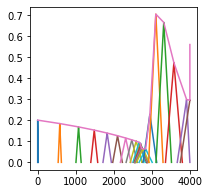

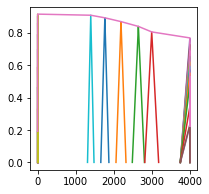

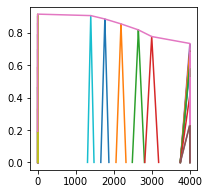

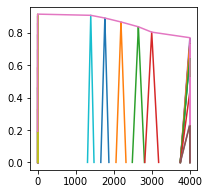

In [0]:
tt1 = time.perf_counter()

## CHOOSING 4 BEST FILTERBANKS FROM THE POPULATION 

best_fbank = 4
"""
best_feature_vect = np.zeros((best_fbank, feat_size))
best_mfcc_coeff = np.zeros((best_fbank, 13))
best_delta_coeff = np.zeros((best_fbank, 13))
best_delta_delta_coeff = np.zeros((best_fbank, 13))
best_frame_energy = np.zeros((best_fbank,3))
"""
ind_sort = np.argsort(valid_accuracy[:,gen-1])
best4_ind = ind_sort[::-1][:4]                          ## select the last for ele. of ind_sort

ESFB=np.zeros((best_fbank,8))

for i in range(best_fbank):
    ESFB[i,:]=EA_population[best4_ind[i],:]
    
                          
accuracy_fbank=np.zeros((best_fbank,2))
yv_test=np.zeros((best_fbank,4))

for bfb in range(best_fbank):                             #cc=[y1, delta, sigma[0,fb], rho[0,fb]]+ y2_rand[fb,:].tolist()
    yv_test[bfb,1]=ESFB[bfb,0]                            # yv[fb][:]=[0,y1,y2,1]
    yv_test[bfb,2]=ESFB[bfb,0]+ESFB[bfb,1]

yv_test[:,3]=1
yv2_test=ESFB[:,4:]

for fb in range(best_fbank):
    
    # formation of spline 1
    y_spline1_t = splineinterpolation(xv,yv_test[fb,:],ESFB[fb,2], ESFB[fb,3])  


    #plot(xx_mod,y_spline1)  

    y_min_t = min(y_spline1_t)                      
    y_max_t = max(y_spline1_t)

    ## OPTIMAIZATION OF FITER FREQ. LOCATION 

    freq_t=np.zeros(nf+1)
    for i in range (nf+1):                                   # i = 1:nf+1                            
        freq_t[i] = (y_spline1_t[i]-y_min_t)*fs/ (2*(y_max_t-y_min_t))

    freq_t=np.sort(freq_t)

    ## OPTIMIZATION OF FILTER AMPLITUDE

    y2_mod_t = [0.2]+ yv2_test[fb,:].tolist()+[1]
    cs_t = pchip(x2_modified, y2_mod_t)
    y_spline2_t=cs_t(xx)               # xx consists nf+2 pts. including end points

    #plt.plot(x2_modified, y2_modified, 'o', label='data')
    #plt.plot(xx, cs(xx), label="S")



    maxi_t=0
    for i in range(nf-1):                                     #i=1:nf-1
        t=np.absolute(freq_t[i+2]-freq_t[i])
        if(t > maxi_t):
            maxi_t=t

    N=256
    col_t=math.ceil(maxi_t*N/fs)+10
    filters_t=np.zeros((26,col_t))

    BW_t=np.zeros(nf)
    for i in range (nf):                                         # i=1:nf
        BW_t[i]=6.23*pow(freq_t[i]/1000,2)+93.39*(freq_t[i]/1000)+28.52


    plt.figure(figsize=(3,3))
    #plt.subplot(2,2)
    
    for i in range (nf):                                               # i=1:nf
        yline1_t = []
        yline2_t = []

        ff1_t = freq_t[i]-BW_t[i]/2
        ff2_t = freq_t[i]+BW_t[i]/2
        if(ff1_t > 0):
            f1_t = np.arange(ff1_t, freq_t[i]+1, fs/N)                             #ff1:fs/N:freq(i)
        else:
            f1_t = np.arange(0, freq_t[i]+1, fs/N)                                                        #0:fs/N:freq[i]

        if(ff2_t > (fs/2)):
            f2_t = np.arange(freq_t[i],(fs/2)+1, fs/N)                         #freq(i):fs/N:(fs/2);
            freq_inter_t = np.intersect1d(f2_t, fs/2)
            if(len(freq_inter_t) == 0):
                f2_t = np.append(f2_t, fs/2)

        else:
            f2_t = np.arange(freq_t[i], ff2_t+1, fs/N)                                      #freq(i):fs/N:ff2;
            freq_inter_t = np.intersect1d(f2_t, ff2_t)
            if(len(freq_inter_t) == 0):
                f2_t = np.append(f2_t, ff2_t)


        if(freq_t[i] == 0 or freq_t[i] == fs/2):
            if(freq_t[i]==0):
                yline1_t.append(np.array([0]))
                yline2_t.append(-y_spline2_t[i]*(f2_t-ff2_t)/(ff2_t-freq_t[i]))
            else:
                yline1_t.append(-y_spline2_t[i]*(f1_t-ff1_t)/(ff1_t-freq_t[i]))
                yline2_t.append(np.array([0]))

        elif(ff1_t<0 and freq_t[i]!=0 and ff2_t <= fs/2 ):
            yline1_t.append(y_spline2_t[i]*f1_t / freq_t[i])
            yline2_t.append(-y_spline2_t[i]*(f2_t-ff2_t) / (ff2_t-freq_t[i]))

        elif(ff2_t > (fs/2) and freq_t[i] < (fs/2) and ff1_t > 0):
            yline1_t.append(-y_spline2_t[i]*(f1_t-ff1_t) / (ff1_t-freq_t[i]))
            yline2_t.append(-y_spline2_t[i]*(f2_t-(fs/2)) / ((fs/2)-freq_t[i]))
        else:
            yline1_t.append(-y_spline2_t[i]*(f1_t-ff1_t) / (ff1_t-freq_t[i]))
            yline2_t.append(-y_spline2_t[i]*(f2_t-ff2_t) / (ff2_t-freq_t[i]))


        L1_t = yline1_t[0].tolist()
        L2_t = yline2_t[0].tolist()
        yline_t = L1_t+L2_t

        k_len_t = len(yline_t)
        f_final_t = np.append(f1_t,f2_t)
        filters_t[i,0:k_len_t] = yline_t
        plt.plot(f_final_t, filters_t[i,0:k_len_t])             # filters(i,1:k_len)


    plt.plot(freq_t , y_spline2_t[0:-1])                  # y_spline2(1:end-1)
    
    #X_set_train = np.zeros((N_data, feat_size))
    #X_set_test = np.zeros((N_test, feat_size))

    #feature_set = np.zeros((len(X_all), feat_size))
    
    """
    for i in range(N_data):

        # y_noisy,STD_n=AWGN(X_data[i],10)
        y_noisy_t = X_data[i]
        X_set_train[i,:] = Mfcc(y_noisy_t, fs, freq_t, filters_t)                       #extracting mfcc coeff.   
        
    for i in range(N_test):
        X_set_test[i,:] = Mfcc(X_test[i], fs, freq_t, filters_t)
    
    X_train_t, X_valid_t, Y_train_t, Y_valid_t = data_norm_and_split(X_set_train,Y_data)
    
    X_test_data = data_norm(X_set_test)
    Y_test_data = np.asarray(Y_test)

    Y_test_pred, acc = SVM_accuracy(X_train_t,X_test_data,Y_train_t,Y_test_data)
    accuracy_test[fb] = acc
    """
    """
    for i in range(len(X_all)):
        feature_set[i,:] = Mfcc(X_pre_emp[i], fs, freq_t, filters_t)
    """
    best_feature_set, best_mfcc_coeff, best_delta_coeff, best_delta_delta_coeff, best_frame_energy = Mfcc_revised_1(X_pre_emp, fs, freq_t, filters_t)

    #print(colored("The observation is made for the best filter bank {}".format (fb), 'red', 'on_grey'), "\n")
    #accuracy_fbank[fb,0], accuracy_fbank[fb,1] = parameter_tuning(best_feature_set, Y_all)
    
    seed = 42
    X_shuffle, y_shuffle = shuffle(best_feature_set, Y_all, random_state=seed)
    X_train_t, X_valid_t, Y_train_t, Y_valid_t = data_norm_and_split(X_shuffle,y_shuffle)

    Y_test_pred, acc = SVM_accuracy(X_train_t, X_valid_t, Y_train_t, Y_valid_t)
    accuracy_test[fb] = acc


tt2 = time.perf_counter()
print(f'Finished in {(tt2-tt1)/60} minutes')


In [0]:
accuracy_fbank

NameError: ignored

In [0]:
def parameter_tuning(feature_vect, Y_data):
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    X = scaler.fit_transform(feature_vect)
    y = np.asarray(Y_data)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
       
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}
    
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 5)
    grid.fit(X_train,y_train)
    print("best_estimator :- ", grid.best_estimator_, "\n")

    grid_predictions = grid.predict(X_test)
    print("confusion_matrix :-" , confusion_matrix(y_test,grid_predictions))
    print("classification_report :-" , classification_report(y_test,grid_predictions))
    print("score:- " , grid.score(X_test,y_test),"\n")


    scores_best = {"True":[], "False": []}
    shuffs = [True, False]

    for shuff in shuffs:
        print(colored("The observation is made when shuffle is {}".format (shuff), 'red', 'on_grey'), "\n")
        """
        best_svc = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
        """
        best_svc = grid.best_estimator_

        # k-fold cross validation

        cv = KFold(n_splits=10, random_state=42, shuffle = shuff)
        for train_index, test_index in cv.split(X):

            #print("Train Index: ", train_index, "\n")
            #print("Test Index: ", test_index)

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
            best_svc.fit(X_train, y_train)
            if(shuff == True):
                scores_best["True"].append(best_svc.score(X_test, y_test))
            else:
                scores_best["False"].append(best_svc.score(X_test, y_test))

            print("\n ")
        
    #scores_best
    Score_shuff_true=scores_best["True"]
    Score_shuff_false = scores_best["False"]
    print("Score_shuff_true :- ", np.mean(Score_shuff_true))
    print("Score_shuff_false :- ", np.mean(Score_shuff_false))
    
    return np.mean(Score_shuff_true), np.mean(Score_shuff_false)

In [0]:
def SVM_accuracy(X_train,X_valid,Y_train,Y_valid):
    y_pred=[]
    accuracy=[]
    
    for kernel in ('linear', 'rbf', 'poly'):
        clf = SVC(kernel=kernel, gamma=10)
        clf.fit(X_train, Y_train)
        #print(clf.score(X_valid,Y_valid))
        
        accuracy.append(clf.score(X_valid,Y_valid))
        y_pred.append(clf.predict(X_valid))
    
    ## for confusion matrix
    #cm1 = ConfusionMatrix(actual_vector=Y_valid, predict_vector=y_pred[0])
    
    return y_pred[0], accuracy[0]                   # here we are returning o/p from linear kernel
    
    


cm1 = ConfusionMatrix(actual_vector=Y_valid, predict_vector=y_pred[0])

print(cm1)

cm1.classes

cm1.table

In [0]:
def data_norm(X_test):
    scaler = preprocessing.StandardScaler()
    Xt_trans = scaler.fit_transform(X_test)
    
    return X_test


In [0]:
def data_norm_and_split(X_set,Y_data):
    Xx = X_set
    yy = np.asarray(Y_data)

    X_t, X_v, y_t, y_v = train_test_split(Xx,yy,test_size=0.2,random_state=27)

    scaler = preprocessing.StandardScaler()
    Xt_trans = scaler.fit_transform(X_t)
    Xv_trans = scaler.fit_transform(X_v)
    
    return Xt_trans,Xv_trans,y_t,y_v


##### data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

##### fit scaler on training data
norm = MinMaxScaler().fit(X_train)

##### transform training data
X_train_norm = norm.transform(X_train)

##### transform testing dataabs
X_test_norm = norm.transform(X_test)

In [0]:
def Mfcc_noisysig(y_noisy, fs, freq, filters):
    
    frame_len = 0.03*fs                    # 30 ms frame length
    L = math.floor(len(y_noisy)/(0.75*frame_len))          #total no. of frame with 25% overlap
    N = 256                                #lenght of fft
    nf=26
    y_fft = np.zeros((N,L-1))
    energy = np.zeros(L-1)          
    for j in range(L-1):                #j = 0:L-2
        y_fft[:,j] = np.absolute(np.fft.fft(y_noisy[int(frame_len*0.75*j): int((frame_len*0.75)*j+frame_len)]*np.hamming(frame_len), N))
        energy[j]=sum(np.absolute(y_fft[:,j]*y_fft[:,j]))
        
    
    # EXTRACTING VOICED PARTS FROM SPEECH SIGNAL

    frame_energy=energy
    ind_count=0
    noisy_initial=np.zeros(N)
    z=1
    for q in range (L-1):                                    #q=1:L-1         
        if(energy[q]/frame_len < 0.2):
            #voiced_frame=[voiced_frame, y_fft[:,q+1];
            #frame_energy(j)=energy(q);
            #j=j+1;
            if(z<=3):
                noisy_initial=noisy_initial+(y_fft[:,q-ind_count])*(y_fft[:,q-ind_count])
                z=z+1
              
            #y_fft[:,q-ind_count]=[]                           # C = np.delete(C, 1, 1) delete second column of C
            y_fft=np.delete(y_fft,q-ind_count,1)
            frame_energy=np.delete(frame_energy,q-ind_count)        #frame_energy[q-ind_count]=[]
            ind_count=ind_count+1
    
    noisy_initial=noisy_initial/3     # estimating initial noise power spectrum
    lamda=0.97                       #forgetting factor
    s_t = np.zeros((N,len(frame_energy)))
    noisy_t = np.zeros((N,len(frame_energy)))
    
    s_t[:,0] = np.absolute(y_fft[:,0]*y_fft[:,0])
    noisy_t[:,0] = lamda*noisy_initial+(1-lamda)*s_t[:,0]
    
    for q in range (1,len(frame_energy)):                              # q=2:length(frame_energy)
        s_t[:,q]=np.absolute(y_fft[:,q]*y_fft[:,q])
        noisy_t[:,q]=lamda*noisy_t[:,q-1]+(1-lamda)*s_t[:,q]
    
    max_frame=max(frame_energy)
    min_frame=min(frame_energy)
    mean_frame=np.mean(frame_energy)
    
    #k1= length(voiced_frame(1,:))
    frame_no= len(y_fft[0,:])

    DCT_mat =np.zeros((frame_no,13))
    M=13                                   #13 point dct of a voiced frame signal
    for p in range (frame_no):        # p=1:frame_no                    
        E_spect=np.zeros(nf-3)              #filter bank energy passing through nf Mel-band pass filter
        E_noisy_spect=np.zeros(nf-3)        #output of nf Mel-scaled filter when estimated noise is passed 
                                                #through filter bank
        SNR=np.zeros(nf-3)
        entropy=np.zeros(nf-3)
        R=np.zeros(nf-3)
        zeta=np.zeros(nf-3)
        W=np.zeros(nf-3)
        for q in range(nf-3):          # q=1:nf-3
            rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames
            
           #spect[q]= log(np.dot(filters[q,1:len(rr)],np.absolute(y_fft[rr,p])))
            E_spect[q]= filters[q,0:len(rr)].dot(s_t[rr,p])
            E_noisy_spect[q]= filters[q,0:len(rr)].dot(noisy_t[rr,p])
            
            x=np.absolute(np.transpose(y_fft[rr,p]))
            for j in range (len(x)):                                    #j=1:length(x)
                x_pmf=x[j]/sum(x)
                entropy[q]=entropy[q]-x_pmf*math.log(x_pmf)
                
       
        #E_spect=np.where(E_spect==math.nan, 0, E_spect)
        #E_spect=np.where(E_spect==math.inf, 0, E_spect)
        for ee in range (len(E_spect)):
            if(E_spect[ee]==math.nan or E_spect[ee]==math.inf):
                E_spect[ee]=0
        
        ## sub-band wiener filtering
        
        tap=20              ## no. of taps of wiener filter
        Rxy=np.correlate(E_spect,E_spect-E_noisy_spect)
        Ry=np.correlate(E_spect,E_spect)
        m=round(len(Rxy)/2)
        Rxy=Rxy[m :m+tap-1]
        Ry=Ry[m:m+tap-1]
        R_Y=toeplitz(Ry)
        h=np.matmul(inv(R_Y),np.transpose(Rxy))             # Filter Coefficients
        E_SWF=np.convolve(E_spect,h)            # enhanced filterbank energy after mel sub-band wiener filtering
        
        ## Calculation of SNR and Entropy for mel sub-bands
        
        for i in range(nf-3):                                 #i=1:nf-3
            SNR[i]=np.sqrt(1+(E_SWF[i]/E_noisy_spect[i]))
            R[i]=SNR[i]/entropy[i]                       ## SNR to Entropy ratio for ith mel frequency sub-band
        
        np.nan_to_num(R,copy=False)          # converting nan to zero and inf to large finite no.
        mean_R=np.mean(R)
        sigma_R=np.sqrt(np.var(R))
        
        for i in range(nf-3):                            # i=1:nf-3
            zeta[i]=1-(1/(1+math.exp(-(R[i]-mean_R)/sigma_R)))  
            W[i]=1-math.exp(-R[i]/zeta[i])
            
        
        #log_ESF=[math.log1p(i) for i in E_SWF]
        E_SWF=np.absolute(E_SWF)
        for i in range (len(E_SWF)):
            if(E_SWF[i]!=0):
                E_SWF[i]=math.log(E_SWF[i])
            else:
                E_SWF[i]=0
            
        spect=W*E_SWF
        DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(spect,n=M))
        
    delta=np.zeros((frame_no-2,13))
    delta_delta = np.zeros((frame_no-4,13))
    for i in range (1,frame_no-1):                                 # i=2:frame_no-1
        delta[i-1,:]=DCT_mat[i+1,:]-DCT_mat[i-1,:]
    
    for i in range (1,frame_no-3):                                  #i=2:frame_no-3
        delta_delta[i-1,:]=delta[i+1,:]-delta[i-1,:]
    

    mfcc_coeff = np.mean(DCT_mat,axis=0)
    delta_coeff = np.mean(delta,axis=0)
    delta_delta_coeff = np.mean(delta_delta,axis=0)
    
    ff1 = np.hstack((mfcc_coeff,delta_coeff,delta_delta_coeff))
    #ff2=np.concatenate(ff1,delta_delta_coeff,axis=1)
    ff1 = np.append(ff1,[mean_frame, min_frame, max_frame])

    f_vect = ff1
    
    ff3=mfcc_coeff
    np.append(ff3,[mean_frame, min_frame, max_frame])
    #f_vect=ff3
    
    return f_vect
#,E_spect,E_SWF,W,zeta,R
        
        

In [0]:
##code for mfcc of original signal
def Mfcc(y_noisy, fs, freq, filters):
    
    frame_len = 0.03*fs                    # 30 ms frame length
    L = math.floor(len(y_noisy)/(0.75*frame_len))          #total no. of frame with 25% overlap
    N = 256                                #lenght of fft
    nf=26
    y_fft = np.zeros((N,L-1))
    energy = np.zeros(L-1)          
    for j in range(L-1):                #j = 0:L-2
        y_fft[:,j] = np.absolute(np.fft.fft(y_noisy[int(frame_len*0.75*j): int((frame_len*0.75)*j+frame_len)]*np.hamming(frame_len), N))
        energy[j]=sum(np.absolute(y_fft[:,j]*y_fft[:,j]))
        
    
    # EXTRACTING VOICED PARTS FROM SPEECH SIGNAL

    frame_energy=energy
    ind_count=0
    for q in range (L-1):                                    #q=1:L-1         
        if(energy[q]/frame_len < 0.2):
            #voiced_frame=[voiced_frame, y_fft[:,q+1];
            #frame_energy(j)=energy(q);
            #j=j+1;
              
            #y_fft[:,q-ind_count]=[]                           # C = np.delete(C, 1, 1) delete second column of C
            y_fft=np.delete(y_fft,q-ind_count,1)
            frame_energy=np.delete(frame_energy,q-ind_count)        #frame_energy[q-ind_count]=[]
            ind_count=ind_count+1
    
    s_t = np.zeros((N,len(frame_energy)))    
    #s_t[:,0] = np.absolute(y_fft[:,0]*y_fft[:,0])
    #noisy_t[:,0] = lamda*noisy_initial+(1-lamda)*s_t[:,0]
    
    for q in range (len(frame_energy)):                              # q=2:length(frame_energy)
        s_t[:,q]=np.absolute(y_fft[:,q]*y_fft[:,q])
        #noisy_t[:,q]=lamda*noisy_t[:,q-1]+(1-lamda)*s_t[:,q]
    
    max_frame=max(frame_energy)
    min_frame=min(frame_energy)
    mean_frame=np.mean(frame_energy)
    
    #k1= length(voiced_frame(1,:))
    frame_no= len(y_fft[0,:])

    DCT_mat =np.zeros((frame_no,13))
    M=13                                   #13 point dct of a voiced frame signal
    for p in range (frame_no):        # p=1:frame_no                    
        E_spect=np.zeros(nf-3)              #filter bank energy passing through nf Mel-band pass filter
        #E_noisy_spect=np.zeros(nf-3)        #output of nf Mel-scaled filter when estimated noise is passed 
                                                #through filter bank
    
        for q in range(nf-3):          # q=1:nf-3
            rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames
            
           #spect[q]= log(np.dot(filters[q,1:len(rr)],np.absolute(y_fft[rr,p])))
            E_spect[q]= filters[q,0:len(rr)].dot(s_t[rr,p])
                
        for ee in range (len(E_spect)):
            if(E_spect[ee]==math.nan or E_spect[ee]==math.inf):
                E_spect[ee]=0
        
        for i in range (len(E_spect)):
            if(E_spect[i]!=0):
                 E_spect[i]=math.log(np.absolute(E_spect[i]))
            else:
                E_spect[i]=0
            
            
        DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(E_spect,n=M))
            
    
    
    delta=np.zeros((frame_no-2,13))
    delta_delta = np.zeros((frame_no-4,13))
    for i in range (1,frame_no-1):                                 # i=2:frame_no-1
        delta[i-1,:]=DCT_mat[i+1,:]-DCT_mat[i-1,:]
    
    for i in range (1,frame_no-3):                                                           #i=2:frame_no-3
        delta_delta[i-1,:]=delta[i+1,:]-delta[i-1,:]
    

    mfcc_coeff=np.mean(DCT_mat,axis=0)
    delta_coeff=np.mean(delta,axis=0)
    delta_delta_coeff=np.mean(delta_delta,axis=0)
    
    ff1=np.hstack((mfcc_coeff,delta_coeff,delta_delta_coeff))
    #ff2=np.concatenate(ff1,delta_delta_coeff,axis=1)
    ff1=np.append(ff1,[mean_frame, min_frame, max_frame])

    f_vect=ff1
    
    ff3=mfcc_coeff
    np.append(ff3,[mean_frame, min_frame, max_frame])
    #f_vect=ff3
    
    return f_vect
#,E_spect,E_SWF,W,zeta,R
        
        

In [0]:
def splineinterpolation(xv,yv,yp1,ypn):

    y2=np.zeros(4)         #2nd derivative
    n=len(y2)
    u=np.zeros(n-1)
    
    if (yp1 > 0.99e99):
        y2[0]=0
        u[0]=0
    else:
        y2[0]=yp1
        u[0]=(3.0/(xv[1]-xv[0]))*((yv[1]-yv[0])/(xv[1]-xv[0]-yp1))
    

    for i in range(1,n-1):                          #i=2:n-1
        sig=(xv[i]-xv[i-1])/(xv[i+1]-xv[i-1])
        p=sig*y2[i-1]+2.0
        y2[i]=(sig-1.0)/p
        u[i]=(yv[i+1]-yv[i])/(xv[i+1]-xv[i]) - (yv[i]-yv[i-1])/(xv[i]-xv[i-1])
        u[i]=(6.0*u[i]/(xv[i+1]-xv[i-1])-sig*u[i-1])/p
    

    if(ypn > 0.99e99):
        qn=0
        un=0
    else:
        qn=0.5
        un=(3.0/(xv[n-1]-xv[n-2]))*(ypn-(yv[n-1]-yv[n-2])/(xv[n-1]-xv[n-2]))
    
    y2[n-1]=(un-qn*u[n-2])/(qn*y2[n-2]+1.0)
                                     
    for k in np.arange(n-2,-1,-1):                                        # k=n-1:-1:1
        y2[k]=y2[k]*y2[k+1]+u[k]
    

    nf=26
    jl=1
    klo=jl
    khi=jl+1
    xx=xv
    h=xx[khi]-xx[klo]
                                     
    #if(h==0) % throw warning
                                     
    x = np.linspace(0,1,nf+3)          # nf+1 points bt 0 & 1, excluding 0 & 1
    x=np.delete(x,[0])
    x=np.delete(x,[27])
                            
    y=np.zeros(nf+1)
    
    for i in range (nf+1):                                 # i=1:nf+1
        a=(xx[khi]-x[i])/h
        b=(x[i]-xx[klo])/h
        y[i]=a*yv[klo]+b*yv[khi]+((a*a*a-a)*y2[klo]+(b*b*b-b)*y2[khi])*(h*h)/6.0
        if(y[i]<0):
            y[i]=0
        if(y[i]>1):
            y[i]=1
        
    #x=[0,x,1];
    #y=[0,y,1];
    # plot(x,y);

    return y


In [0]:
def AWGN_new(X,snr):
    N = len(X)
    y_noisy = []
    for i in range(N): 
        x=X[i]
        sig_power = np.mean(np.abs(x.tolist())**2)
        sig_db = 10 * np.log10(sig_power)
        noise_db = sig_db -snr
        noise_power = 10 ** (noise_db / 10)
        # Generate an sample of white noise
        mean_noise = 0
        noise = np.random.normal(mean_noise, np.sqrt(noise_power), len(x))
        # Noise up the original signal
        y_noisy.append(x + noise)
    return y_noisy

def awgn(signal,SNR):
    
    # Set a target SNR
    target_snr_db = SNR
    x_watts=signal
    # Calculate signal power and convert to dB 
    sig_avg_watts = np.mean(x_watts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    # Calculate noise according to [2] then convert to watts
    noise_avg_db = sig_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    # Generate an sample of white noise
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
    return noise_volts

In [0]:
def Evolution(EA_population,accuracy,yv,g):
    import random
    total_fbank=30
    current_member = 1
    lamda=20                                                                #selecting lamda individuals from 30 chromosomes
    chromo_size=8
    mating_pool=np.zeros((total_fbank,chromo_size))
    val =max(accuracy[:,g])
    best_indx=accuracy[:,g].tolist().index(max(accuracy[:,g]))
    best_individual=EA_population[best_indx,:]                             # best individual out of 30 individuals
    mating_pool[0,:]=best_individual                                       #elitist strategy
    #qq=np.zeros(lamda-1)
    qq=[]
    while current_member <lamda:
        rand_ind=random.sample(range(total_fbank), 10)                     # picking 10 individuals randomly out of 30
        best=0
        counter=0
        for j in range(len(rand_ind)):
            if current_member==1 and accuracy[rand_ind[j],g] > best and rand_ind[j]!=best_indx:
                best= accuracy[rand_ind[j],g]
                counter=j
            elif current_member >1 and accuracy[rand_ind[j],g] > best and rand_ind[j]!=best_indx:
                inter=list(set(qq) & set(rand_ind))
                if not inter:
                    best=accuracy[rand_ind[j],g]
                    counter=j
                else:
                    continue
               
        if (counter>0):
            mating_pool[current_member,:]=EA_population[rand_ind[counter],:]
            qq.append(rand_ind[counter])
            current_member+=1
      
    ## ONE POINT CROSSOVER
      
    slt=np.random.permutation(20) 
    select=slt.tolist()
    select.remove(0) 
    kk=20
    total=list(range(0,30))
    r=list(set(total).difference(set(qq)))
    if best_indx in r:
        r.remove(best_indx)
    n=len(r)
    
    for q in range(0,18,2):
        prob_crr = np.random.random()
        if (prob_crr <= 0.9):
            point=random.randint(1,6)
            mating_pool[kk,:]=mating_pool[select[q],0:point].tolist() + mating_pool[select[q+1],point:].tolist()
                                 
        else:
            p=np.random.randint(n)
            prnt_idx=r[p]
            r.remove(prnt_idx)
            n=n-1
            mating_pool[kk,:]=EA_population[prnt_idx,:]
                                  
    ### MUTATION OPERATOR ###
        for zz in range(chromo_size):
            if np.random.random() <= 0.12 :                                     #mutation probability is 0.12
                mating_pool[kk,zz]=np.random.random()
              
             
        kk=kk+1
        if (kk==29):
            mating_pool[kk,:]=[mating_pool[19,i] + mating_pool[18,i] for i in range(len(mating_pool[19,:]))] 
            #mating_pool[kk,:]=mating_pool[19,:]mating_pool[18,:]      # making last mating population as the combi of 19th & 20th mating population
        
    EA_population=mating_pool
    
    ## PARAMETER UPDATION
    for ff in range(total_fbank): 
        ## spline1 parameter updation
        a1=0.1
        yv[ff,1]=EA_population[ff,0]
        if yv[ff,1]>=1:
            yv[ff,1]=a1+np.random.random()*(1-2*a1)                      # parameter to limit range of spline in bet. 0 & 1   
            EA_population[ff,0]=yv[ff,1]
                                  
        y2_temp=EA_population[ff,0]+EA_population[ff,1]
        if (y2_temp >1):
            delta_temp=np.random.random()*(1-a-yv[ff,1])
            y2_temp=delta_temp+yv[ff,1]
            EA_population[ff,1]=delta_temp
                                  
        yv[ff,2]=y2_temp
         
        ### spline2 parameter updation
        y2_rand[ff,:]=EA_population[ff,4:]
        for i in range(4):
            if (y2_rand[ff,i]>0.9 or y2_rand[ff,i]<0.25):
                y2_rand[ff,i]=np.random.random()*(0.9-0.25)+0.25
                EA_population[ff,i+4]=y2_rand[ff,i]
          
              
    
    return EA_population,yv,y2_rand
